[View in Colaboratory](https://colab.research.google.com/github/TomasBombadillo/Inception_neural-network/blob/master/Tarea4_TLM.ipynb)

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("data/",one_hot=True)
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
def inception_layer(IN,n_convs,kernels,strides):
  convo11 = tf.layers.conv2d(IN,
                         n_convs[0][0],
                         kernel_size=kernels[0][0],
                         strides=strides[0][0],
                         padding="SAME",
                         activation=tf.nn.relu)
  
  convo21 = tf.layers.conv2d(IN,
                         n_convs[1][0],
                         kernel_size=kernels[1][0],
                         strides=strides[1][0],
                         padding="SAME",
                         activation=tf.nn.relu)
  convo22 = tf.layers.conv2d(convo21,
                         n_convs[1][1],
                         kernel_size=kernels[1][1],
                         strides=strides[1][1],
                         padding="SAME",
                         activation=tf.nn.relu)
  
  convo31 = tf.layers.conv2d(IN,
                         n_convs[2][0],
                         kernel_size=kernels[2][0],
                         strides=strides[2][0],
                         padding="SAME",
                         activation=tf.nn.relu)
  convo32 = tf.layers.conv2d(convo31,
                         n_convs[2][1],
                         kernel_size=kernels[2][1],
                         strides=strides[2][1],
                         padding="SAME",
                         activation=tf.nn.relu)
  convo33 = tf.layers.conv2d(convo32,
                         n_convs[2][2],
                         kernel_size=kernels[2][2],
                         strides=strides[2][2],
                         padding="SAME",
                         activation=tf.nn.relu)
  
  concat = tf.concat([convo11,convo22,convo33],axis=3)
  
  convo_end = tf.layers.conv2d(concat,
                         64,
                         kernel_size=1,
                         strides=1,
                         padding="SAME",
                         activation=None)
  
  convo_end = tf.nn.relu(tf.add(convo_end,pool1))
  
  
  return convo_end

In [0]:
convos = 64
conv_kernel = 3
conv_stride = 1
inception = [[32],[32,32],[32,32,32]]
inc_kernels = [[1],[1,3],[1,3,3]]
inc_strides = [[1],[1,1],[1,1,1]]
pools = [2,2]

In [0]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, 28,28, 1))
y = tf.placeholder(tf.float32, shape=(None, 10))

convo = tf.layers.conv2d(X,
						convos,
						kernel_size = conv_kernel,
						strides = conv_stride,
						padding = "SAME",
						activation = tf.nn.relu)

pool1 = tf.layers.max_pooling2d(convo,
						pool_size= pools[0],
						strides = pools[0],
						padding = "SAME")

incept = inception_layer(pool1,
						inception,
						inc_kernels,
						inc_strides)

pool2 = tf.layers.max_pooling2d(incept,
						pool_size= pools[1],
						strides = pools[1],
						padding = "SAME")

flat = tf.reshape(pool2, shape=[-1, pool2.shape[1] * pool2.shape[2] * pool2.shape[3]])

dense = tf.layers.dense(flat, 64, activation=tf.nn.relu)

logits = tf.layers.dense(dense, 10)
y_pred=tf.nn.softmax(logits)

In [0]:
xentropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.001
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.equal(tf.argmax(y,1),tf.argmax(y_pred,1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [7]:
n_epochs = 10
batch_size = 50
iters=mnist.train.num_examples // batch_size
accu = []
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        acc_train=0
        for iteration in range(iters):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            curr_acc,_=sess.run([accuracy,training_op], feed_dict={X: X_batch.reshape(-1,28,28,1), y: y_batch})
            acc_train += curr_acc
            accu.append(curr_acc)
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images.reshape(-1,28,28,1), y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train/iters, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.9500000005689534 Test accuracy: 0.9806
1 Train accuracy: 0.984600003415888 Test accuracy: 0.9863
2 Train accuracy: 0.9889272768389095 Test accuracy: 0.9894
3 Train accuracy: 0.9911636406183243 Test accuracy: 0.9921
4 Train accuracy: 0.9932909124547785 Test accuracy: 0.9916
5 Train accuracy: 0.9941636397079988 Test accuracy: 0.991
6 Train accuracy: 0.9953636393763802 Test accuracy: 0.9862
7 Train accuracy: 0.9958727302334526 Test accuracy: 0.9907
8 Train accuracy: 0.9962909117070111 Test accuracy: 0.9921
9 Train accuracy: 0.9971818201650273 Test accuracy: 0.9919


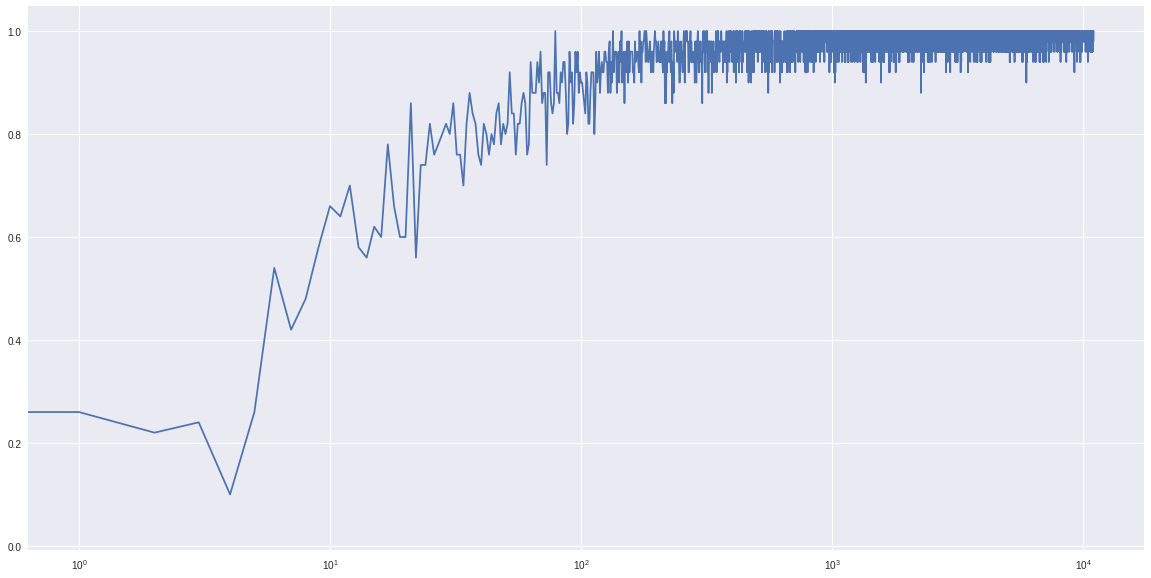

In [16]:
plt.figure(figsize=(20,10))
plt.semilogx(np.arange(iters*n_epochs),accu)